In [2]:
for i in range(1):
    print(i)

0


In [3]:
def f1():
    print("f1")
def f2():
    print("f2")

function_names = vars()
names = ['f1', 'f2']

for name in names:
    function_names[name]()

f1
f2


In [3]:
import pandas as pd

s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series([1,2,4,3,5])

pd.Series(s1 == s2).value_counts()[True]



3

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

In [12]:
import pandas as pd

s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series([-4,3,4,3,8])

error = s1-s2
print(error)
square_err = error**2
print(square_err)
mean_square_error = square_err.mean()
print(mean_square_error)
rmse = mean_square_error**0.5
print(rmse)


0    5
1   -1
2   -1
3    1
4   -3
dtype: int64
0    25
1     1
2     1
3     1
4     9
dtype: int64
7.4
2.7202941017470885


In [13]:
abs_error = abs(s1-s2)
mean_abs_error = abs_error.mean()
print(mean_abs_error)

2.2


In [15]:
sr = pd.Series([8, 9, 10,3,6,3,2,6,8,1,4,2,3,5,5,3,6,8,4,8,4,3,2,6,8,4,2,6,8])
sr.unique()

array([ 8,  9, 10,  3,  6,  2,  1,  4,  5], dtype=int64)

In [105]:

Xd = pd.DataFrame({'a': ['A','B','A','A','B'], 'b': ['C','C','D','D','C']})
Yr = pd.Series([1, 2, 3, 4, 5])
Xr = pd.DataFrame({'a': [2.5,2.4,3.2,2.25,3.5], 'b': [1.5,0.6,3.2,4.25,5.5]})


In [106]:
import numpy as np
import pandas as pd

def reduction_in_variance(Y: pd.Series, attr: pd.Series) -> float:
    """
    Function to calculate the reduction in variance
    """
    if len(Y) == 0:
        return 0
    # For discrete input data - continuous output data
    if attr.dtype == "object":
        attr = attr.astype('category')
        class_count = attr.value_counts()
        gain = np.var(Y)
        for c in class_count.index:
            gain -= (class_count[c]/len(Y)) * np.var(Y[attr == c])
        return gain
    
    # For continuous input data - continuous output data
    
    else:
        # TODO sort Y and attr by attr 
        df = pd.DataFrame({'attr': attr, 'Y': Y})
        df = df.sort_values(by=['attr'])

        print(df)
        print()

        df['attr'].astype('float')
        if len(Y) == 1:
            return 0
        max_gain = 0
        split_value = df['Y'][0]
        gain_of_y = np.var(df['Y'])
        for y in range(len(Y)-1):
            split = (df['Y'][y] + df['Y'][y+1])/2
            gain = gain_of_y 
            gain -= (len(df['Y'][df['attr'] <= split])/len(Y)) * np.var(df['Y'][df['attr'] <= split])
            gain -= (len(df['Y'][df['attr'] > split])/len(Y)) * np.var(df['Y'][df['attr'] > split])
            if gain > max_gain:
                max_gain = gain
                split_value = split
        return max_gain , split_value




In [107]:
print(reduction_in_variance(Yr, Xd['a']))
print(reduction_in_variance(Yr, Xd['b']))
print(reduction_in_variance(Yr, Xr['a']))
print(reduction_in_variance(Yr, Xr['b']))

0.16666666666666685
0.16666666666666638
   attr  Y
3  2.25  4
1  2.40  2
0  2.50  1
2  3.20  3
4  3.50  5

(0.6666666666666669, 2.5)
   attr  Y
1  0.60  2
0  1.50  1
2  3.20  3
3  4.25  4
4  5.50  5

(1.5, 1.5)


# Check the information gain and entropy function

In [127]:
Xd = pd.DataFrame({'a': ['B','B','A','A','B', 'B', 'A'], 'b': ['C','C','D','D','C','D','D']})
Yd = pd.Series(['Y', 'N', 'Y', 'Y', 'N', 'N', 'N'])
Xr = pd.DataFrame({'a': [0.5,2.4,3.2,2.25,3.5,1.5,1.76], 'b': [1.5,0.6,3.2,4.25,5.5,6.9,10.0]})


In [128]:
def entropy(Y: pd.Series) -> float:
    """
    Function to calculate the entropy
    """
    class_counter = dict() 
    for y in Y:
        class_counter[y] = class_counter.get(y,0) + 1

    entropy = 0
    for y in class_counter:
        p = class_counter[y]/len(Y)
        entropy -= p * np.log2(p)

    return entropy

In [129]:

def information_gain(Y: pd.Series, attr: pd.Series) -> float:
    """
    Function to calculate the information gain
    """
    if len(Y) == 0:
        return 0
    
    if attr.dtype == "object":
        attr = attr.astype('category')
        # attr = attr.cat.codes
        class_count = attr.value_counts()
        gain = entropy(Y)
        for c in class_count.index:
            gain -= (class_count[c]/len(Y)) * entropy(Y[attr == c])

        return gain
    
    else:
        attr = attr.astype('float')
        gain = entropy(Y)

        # TODO sort Y and attr by attr 
        df = pd.DataFrame({'attr': attr, 'Y': Y})
        df = df.sort_values(by=['attr'])

        print(df)
        print()

        # df['attr'].astype('float')
        if len(Y) == 1:
            return 0

        max_gain = 0
        # split_value = df['Y'][0]
        gain_of_y = entropy(df['Y'])
        for y in range(len(Y)-1):
            if df['Y'][y] == df['Y'][y+1]:
                continue
            split = (df['attr'][y] + df['attr'][y+1])/2
            gain = gain_of_y
            gain -= (len(df['Y'][df['attr'] <= split])/len(Y)) * entropy(df['Y'][df['attr'] <= split])
            gain -= (len(df['Y'][df['attr'] > split])/len(Y)) * entropy(df['Y'][df['attr'] > split])
            if gain > max_gain:
                max_gain = gain
                split_value = split
        return max_gain , split_value
        
        # for c in attr.unique():
        #     gain -= (len(Y[attr == c])/len(Y)) * entropy(Y[attr == c])
        # return gain


In [130]:
print(information_gain(Yd, Xd['a']))
print(information_gain(Yd, Xd['b']))

print(information_gain(Yd, Xr['a']))
print(information_gain(Yd, Xr['b']))

0.12808527889139443
0.020244207153756077
   attr  Y
0  0.50  Y
5  1.50  N
6  1.76  N
3  2.25  Y
1  2.40  N
2  3.20  Y
4  3.50  N

(0.19811742113040343, 1.45)
    attr  Y
1   0.60  N
0   1.50  Y
2   3.20  Y
3   4.25  Y
4   5.50  N
5   6.90  N
6  10.00  N

(0.5216406363433185, 4.875)


# Gini index 


In [133]:
def gini_index(Y: pd.Series) -> float:
    """
    Function to calculate the gini index
    """
    class_counter = Y.value_counts()
    gini = 1
    for y in class_counter.index:
        p = class_counter[y]/len(Y)
        gini -= p**2         
    
    return gini

In [134]:
def avg_gini_coefficient(Y: pd.Series, X: pd.Series) -> float:
    """
    Function to calculate the average gini coefficient
    """
    if len(Y) == 0:
        return 0
    
    if X.dtype == "object":
        X = X.astype('category')
        class_count = X.value_counts()
        weighted_gini = 0
        for c in class_count.index:
            weighted_gini += (class_count[c]/len(Y)) * gini_index(Y[X == c]) 
        return weighted_gini, None      

    else:
        X = X.astype('float')
        # TODO sort Y and attr by attr 
        df = pd.DataFrame({'attr': X, 'Y': Y})
        df = df.sort_values(by=['attr'])

        print(df)
        print()

        if len(Y) == 1:
            return 0

        min_gini = 1
        split_value = df['Y'][0]
        gini_of_y = gini_index(df['Y'])
        for y in range(len(Y)-1):
            
            if df['Y'][y] == df['Y'][y+1]:
                continue
            split = (df['attr'][y] + df['attr'][y+1])/2
            weighted_gini = 0
            weighted_gini += (len(df['Y'][df['attr'] <= split])/len(Y) * gini_index(Y[X <= split]))
            weighted_gini += (len(df['Y'][df['attr'] > split])/len(Y) * gini_index(Y[X > split])) 

            if weighted_gini < min_gini:
                min_gini = weighted_gini
                split_value = split
        return min_gini , split_value

In [135]:
print(avg_gini_coefficient(Yd, Xd['a']))
print(avg_gini_coefficient(Yd, Xd['b']))
print(avg_gini_coefficient(Yd, Xr['a']))
print(avg_gini_coefficient(Yd, Xr['b']))

(0.40476190476190477, None)
(0.47619047619047616, None)
   attr  Y
0  0.50  Y
5  1.50  N
6  1.76  N
3  2.25  Y
1  2.40  N
2  3.20  Y
4  3.50  N

(0.38095238095238093, 1.45)
    attr  Y
1   0.60  N
0   1.50  Y
2   3.20  Y
3   4.25  Y
4   5.50  N
5   6.90  N
6  10.00  N

(0.21428571428571427, 4.875)


# CHECK the type of input and output

In [147]:
Y1 = pd.Series(['Y', 'N', 'Y', 'Y', 'N', 'N', 'N'])
X1 = pd.DataFrame({'a': ['B','B','A','A','B', 'B', 'A'], 'b': ['C','C','D','D','C','D','D']})
Y2 = pd.Series([1,2,3,4,5,6,7])
X2 = pd.DataFrame({'a': [0.5,2.4,3.2,2.25,3.5,1.5,1.76], 'b': [1.5,0.6,3.2,4.25,5.5,6.9,10.0]})
X3 = pd.DataFrame({'a': [0.5,2.4,3.2,2.25,3.5,1.5,1.76], 'b': ['C','C','D','D','C','D','D']})

In [146]:
X1.dtypes[0] == object

True

In [145]:
X2.dtypes == 'object'

a    False
b    False
dtype: bool

In [143]:
Y1.dtypes == 'object'

True

In [144]:
Y2.dtypes == 'object'

False

In [151]:
X3.dtypes[0] == 'object'

False

In [152]:
X3.dtypes[1] == 'object'

True

In [162]:
def f(s):
    s['a'][0] = 10

import pandas as pd

s = pd.DataFrame({'a': [1,2,3,4,5,6,7,8,9,10], 'b': [1,2,3,4,5,6,7,8,9,10], 'c': [1,2,3,4,5,6,7,8,9,10]})
# delete a column from dataframe
s1 = s.copy()
del s1['a']
f(s)
print(s)

    a   b   c
0  10   1   1
1   2   2   2
2   3   3   3
3   4   4   4
4   5   5   5
5   6   6   6
6   7   7   7
7   8   8   8
8   9   9   9
9  10  10  10


In [164]:
class C:
    def __init__(self,limit):
        self.a = limit
        self.next = None

def f(limit):
    if limit == 0:
        return
    c = C(limit)
    c.next = f(limit-1)
    return c

c = f(10)

i = 0
while(c != None and i < 10):
    print(c.a)
    c = c.next
    i+=1

10
9
8
7
6
5
4
3
2
1


In [165]:
condition = 5==6

In [166]:
condition

False

In [168]:
class Condition:
    def __init__(self,logical_operator,value):
        self.logical_operator = logical_operator
        self.value = value
    
    def evaluate(self,operand):
        if self.logical_operator == '==':
            return operand == self.value
        elif self.logical_operator == '!=':
            return operand != self.value
        elif self.logical_operator == '>':
            return operand > self.value
        elif self.logical_operator == '<':
            return operand < self.value
        elif self.logical_operator == '>=':
            return operand >= self.value
        elif self.logical_operator == '<=':
            return operand <= self.value
        elif self.logical_operator == 'in':
            return operand in self.value
        elif self.logical_operator == 'not in':
            return operand not in self.value
        elif self.logical_operator == 'is':
            return operand is self.value
        elif self.logical_operator == 'is not':
            return operand is not self.value
        elif self.logical_operator == 'and':
            return operand and self.value
        elif self.logical_operator == 'or':
            return operand or self.value
        elif self.logical_operator == 'not':
            return not operand



In [169]:
c = Condition('==',5)
c.evaluate(5)

True

In [7]:
from dataclasses import dataclass

@dataclass
class A:
    p: int
    q: str
    r: float

    def f(self) -> (int, str, float):
        return self.p, self.q, self.r

a = A(1, 'a', 1.0)

a.f()

(1, 'a', 1.0)

In [9]:
import pandas as pd

df = pd.DataFrame({'a': [1,2,3,4,5,6,7,8,9,10], 'b': [1,2,3,4,5,6,7,8,9,10], 'c': [1,2,3,4,5,6,7,8,9,10]}, index=[4,1,7,12,88,3,2,9,10,5])
df

,a,b,c
4,1,1,1
1,2,2,2
7,3,3,3
12,4,4,4
88,5,5,5
3,6,6,6
2,7,7,7
9,8,8,8
10,9,9,9
5,10,10,10


In [14]:
# for i in range(len(df)-1):
#     print(df['c'].iloc[i])

type(df.iloc[0])

pandas.core.series.Series

In [4]:
df['a'] == 10

4     False
1     False
7     False
12    False
88    False
3     False
2     False
9     False
10    False
5      True
Name: a, dtype: bool

In [5]:
for attr in df.columns:
    print(attr)

a
b
c


In [10]:
for i in range(len(df)):
    print(dict(df.iloc[i]))

{'a': 1, 'b': 1, 'c': 1}
{'a': 2, 'b': 2, 'c': 2}
{'a': 3, 'b': 3, 'c': 3}
{'a': 4, 'b': 4, 'c': 4}
{'a': 5, 'b': 5, 'c': 5}
{'a': 6, 'b': 6, 'c': 6}
{'a': 7, 'b': 7, 'c': 7}
{'a': 8, 'b': 8, 'c': 8}
{'a': 9, 'b': 9, 'c': 9}
{'a': 10, 'b': 10, 'c': 10}


In [2]:
d = {'a': 1}


In [3]:
d

{'a': 1}

In [8]:
# merge two dictionaries

d1 = {'a': [1,2,3,], 'b': 'str'}
d2 = {'a': 3, 'd': {1:2, 3:4}}

d1.update(d2)

d1

{'a': 3, 'b': 'str', 'd': {1: 2, 3: 4}}

In [2]:
import pandas as pd 
s = pd.Series(['a','b','a'])
s

0    a
1    b
2    a
dtype: object

In [3]:
s.mode()

0    a
dtype: object

In [8]:
import math
E_y = -((4/5)*math.log2(4/5) + (1/5)*math.log2(1/5))
E_y

0.7219280948873623

In [9]:
E_x0_4 = -((1/3)*math.log2(1/3) + (2/3)*math.log2(2/3))
E_x0_4

0.9182958340544896

In [11]:
E_x0 = E_y - (3/5)*E_x0_4
E_x0

0.17095059445466865

In [12]:
E_x1_2 = -((1/3)*math.log2(1/3) + (1/3)*math.log2(1/3) + (1/3)*math.log2(1/3))
E_x1_2

1.584962500721156

In [14]:
E_x1 = E_y - (3/5)*E_x1_2
E_x1

-0.22904940554533126

In [16]:
E_x2_3 = -((1/2)*math.log2(1/2) + (1/2)*math.log2(1/2))
E_x2_3

1.0

In [17]:
E_x2 = E_y - (2/5)*E_x2_3
E_x2

0.3219280948873623

In [20]:
-1 * 1024 *((1/1024) * math.log2(1/1024) )

10.0

In [21]:
import pandas as pd

y = pd.Series([3,4,2,5,1])

y.max()

5

In [25]:
X = pd.DataFrame({'a': [1,2,3,4,5], 'b': [1,2,3,4,5], 'c': [1,2,3,4,5]})
X

,a,b,c
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4
4,5,5,5


In [26]:
X.columns[0]

'a'

In [27]:
d = {1:2, (1,2):33}

In [28]:
d

{1: 2, (1, 2): 33}

In [34]:
from sklearn.datasets import make_classification
X, y = make_classification(
n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)


(100, 2)

In [31]:
X = pd.DataFrame(X, columns=[i for i in range(X.shape[1])])
X

,0,1
0,0.800227,-0.285654
1,0.941844,-0.060086
2,-0.347924,-0.866213
3,-0.222150,-0.911294
4,-0.772215,-0.240549
...,...,...
95,0.440461,-0.600299
96,-0.345212,1.160864
97,-0.923689,-0.108154
98,0.482517,-0.161524


In [38]:
X[:70]

array([[ 8.00227169e-01, -2.85653903e-01],
       [ 9.41844252e-01, -6.00855393e-02],
       [-3.47924448e-01, -8.66213235e-01],
       [-2.22150149e-01, -9.11294144e-01],
       [-7.72214654e-01, -2.40548939e-01],
       [ 2.86942710e-01,  4.42948786e-01],
       [ 3.16957655e-01, -6.24787067e-01],
       [ 1.18227070e+00, -1.75968771e-01],
       [-5.72233433e-01, -2.70151304e-01],
       [-5.65392972e-01,  6.12573764e-01],
       [-8.32329524e-01,  1.02456713e-01],
       [-1.96371397e-01,  4.63827158e-01],
       [ 3.23406141e-01,  2.56192605e-01],
       [-1.01555340e+00, -6.58048526e-01],
       [-2.89717763e-01,  1.20347973e+00],
       [ 3.58878413e-01,  5.44579655e-01],
       [-9.50013352e-01, -2.26541589e-01],
       [ 2.09932404e-01,  1.90209191e-01],
       [-2.90959348e-01,  1.10495551e+00],
       [-5.80775364e-01, -6.55307463e-01],
       [-1.06917330e+00, -1.04054806e+00],
       [-2.56884293e-02,  1.02568161e+00],
       [-7.74060422e-01,  3.56569604e-01],
       [ 3.

In [39]:
len(X)

100

In [49]:
X_train, X_test, y_train, y_test = X[:int(0.7*len(X))], X[int(0.7*len(X)):], y[:int(0.7*len(y))], y[int(0.7*len(y)):]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 2), (30, 2), (70,), (30,))

In [50]:
pd.Series(y_train)

0     1
1     1
2     0
3     0
4     0
     ..
65    1
66    1
67    1
68    0
69    0
Length: 70, dtype: int32

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)

# Read dataset
# ...
# 

from sklearn.datasets import make_classification
X, y = make_classification(
n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

X_train, X_test, y_train, y_test = pd.DataFrame(X[:int(0.7*len(X))]), pd.DataFrame(X[int(0.7*len(X)):]), pd.Series(y[:int(0.7*len(y))], dtype = 'category'), pd.Series(y[int(0.7*len(y)):], dtype = 'category')
# X_train, X_test, y_train, y_test = X[:int(0.7*len(X))], X[int(0.7*len(X)):], y[:int(0.7*len(y))], y[int(0.7*len(y)):]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# For plotting




    # print(y_hat.shape, y_test.shape)
    # plt.scatter(y_test, y_hat)
    # plt.show()



(70, 2) (30, 2) (70,) (30,)


In [53]:
criteria = 'information_gain'
tree = DecisionTree(criterion=criteria, max_depth=8) #Split based on Inf. Gain
tree.fit(X_train, y_train)
tree.plot()

y_hat_train = tree.predict(X_train)
print('Training Results:')
print('Criteria :', criteria)
print('Accuracy: ', accuracy(y_hat_train, y_train))
for cls in y_train.unique():
    print('Class: ', cls)
    print('Precision: ', precision(y_hat_train, y_train, cls))
    print('Recall: ', recall(y_hat_train, y_train, cls))
    print()

y_hat = tree.predict(X_test)
print('Testing Results:')
print('Criteria :', criteria)
# print(y_hat)
# print(y_test)
print('Accuracy: ', accuracy(y_hat, y_test))
for cls in y_test.unique():
    print('Class: ', cls)
    print('Precision: ', precision(y_hat, y_test, cls))
    print('Recall: ', recall(y_hat, y_test, cls))
    print()

Training Results:
Criteria : information_gain
Accuracy:  1.0
Class:  1
Precision:  1.0
Recall:  1.0

Class:  0
Precision:  1.0
Recall:  1.0

Testing Results:
Criteria : information_gain
Accuracy:  0.9
Class:  0
Precision:  0.9090909090909091
Recall:  0.8333333333333334

Class:  1
Precision:  0.8947368421052632
Recall:  0.9444444444444444



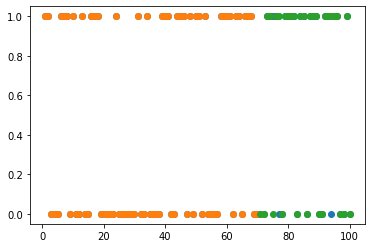

In [54]:
arr_x = [i+1 for i in range(len(y))]

plt.scatter(arr_x, y, label='y')
plt.scatter(arr_x[:int(0.7*len(y))], y_hat_train, label='y_train_pred')
plt.scatter(arr_x[int(0.7*len(y)):], y_hat, label='y_test_pred')
plt.show()

In [55]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [75]:
foldX = [X[int(i/5 *len(X)) : int((i+1)/5 *len(X))] for i in range(5)]
foldy = [y[int(i/5 *len(y)) : int((i+1)/5 *len(y))] for i in range(5)]

# foldX1, foldX2, foldX3, foldX4, foldX5 = pd.DataFrame(foldX1), pd.DataFrame(foldX2), pd.DataFrame(foldX3), pd.DataFrame(foldX4), pd.DataFrame(foldX5)
# foldy1, foldy2, foldy3, foldy4, foldy5 = pd.Series(foldy1, dtype = 'category'), pd.Series(foldy2, dtype = 'category'), pd.Series(foldy3, dtype = 'category'), pd.Series(foldy4, dtype = 'category'), pd.Series(foldy5, dtype = 'category')

# trainX1, testX1 = pd.concat([foldX2, foldX3, foldX4, foldX5]), foldX1
# trainy1, testy1 = pd.concat([foldy2, foldy3, foldy4, foldy5]), foldy1

# trainX2, testX2 = pd.concat([foldX1, foldX3, foldX4, foldX5]), foldX2
# trainy2, testy2 = pd.concat([foldy1, foldy3, foldy4, foldy5]), foldy2

# trainX3, testX3 = pd.concat([foldX1, foldX2, foldX4, foldX5]), foldX3
# trainy3, testy3 = pd.concat([foldy1, foldy2, foldy4, foldy5]), foldy3

# trainX4, testX4 = pd.concat([foldX1, foldX2, foldX3, foldX5]), foldX4
# trainy4, testy4 = pd.concat([foldy1, foldy2, foldy3, foldy5]), foldy4

# trainX5, testX5 = pd.concat([foldX1, foldX2, foldX3, foldX4]), foldX5
# trainy5, testy5 = pd.concat([foldy1, foldy2, foldy3, foldy5]), foldy5



(20, 2)
(20, 2)
(20, 2)
(20, 2)
(20, 2)


In [82]:
def get_scores(trainX, trainY, testX, testY, depth, criteria):
    tree = DecisionTree(criterion=criteria, max_depth=depth) #Split based on Inf. Gain
    tree.fit(X_train, y_train)
    y_hat = tree.predict(X_test)
    acc = accuracy(y_hat, y_test)
    return acc

    


In [94]:
all_accurary = []
all_precision = []
all_recall = []
criteria = 'information_gain'


foldX = [X[int(i/5 *len(X)) : int((i+1)/5 *len(X))] for i in range(5)]
foldy = [y[int(i/5 *len(y)) : int((i+1)/5 *len(y))] for i in range(5)]

testing_score = {}
for outerFold in range(1, 6):
    testX = pd.DataFrame(foldX[outerFold-1])
    testY = pd.Series(foldy[outerFold-1])
    trainX = pd.concat([pd.DataFrame(foldX[(outerFold+i)%5]) for i in range(1,5)]).reset_index(drop=True)
    trainY = pd.concat([pd.Series(foldy[(outerFold+1)%5]) for i in range(1,5) ]).reset_index(drop=True)

    foldX_inner = [trainX[int(i/5 *len(X)) : int((i+1)/5 *len(X))] for i in range(5)]
    foldy_inner = [trainY[int(i/5 *len(y)) : int((i+1)/5 *len(y))] for i in range(5)]

    depth_accuracy_map = dict()
    for depth in range(1,10):
        validation_score = []
        # for innerfold in range(1, 6):
        innerfold = 1
        valdX = pd.DataFrame(foldX_inner[innerfold-1])
        valdY = pd.Series(foldy_inner[innerfold-1])
        trainX_inner = pd.concat([pd.DataFrame(foldX_inner[(outerFold+i)%5]) for i in range(1,5)]).reset_index(drop=True)
        trainY_inner = pd.concat([pd.Series(foldy_inner[(outerFold+1)%5]) for i in range(1,5) ]).reset_index(drop=True)
        
        ####
        validation_score.append(get_scores(trainX_inner, trainY_inner, valdX, valdY, depth, criteria))

        depth_accuracy_map[depth] = np.mean(validation_score)
    print(depth_accuracy_map)
    max_depth_accuracy = max(depth_accuracy_map, key= lambda x: depth_accuracy_map[x])
    print(max_depth_accuracy)
    testing_score[max_depth_accuracy] = get_scores(trainX, trainY, testX, testY, max_depth_accuracy, criteria)

testing_score

            
    

{1: 0.9333333333333333, 2: 0.9333333333333333, 3: 0.8666666666666667, 4: 0.9, 5: 0.9, 6: 0.9, 7: 0.9, 8: 0.9, 9: 0.9}
1
{1: 0.9333333333333333, 2: 0.9333333333333333, 3: 0.8666666666666667, 4: 0.9, 5: 0.9, 6: 0.9, 7: 0.9, 8: 0.9, 9: 0.9}
1
{1: 0.9333333333333333, 2: 0.9333333333333333, 3: 0.8666666666666667, 4: 0.9, 5: 0.9, 6: 0.9, 7: 0.9, 8: 0.9, 9: 0.9}
1
{1: 0.9333333333333333, 2: 0.9333333333333333, 3: 0.8666666666666667, 4: 0.9, 5: 0.9, 6: 0.9, 7: 0.9, 8: 0.9, 9: 0.9}
1
{1: 0.9333333333333333, 2: 0.9333333333333333, 3: 0.8666666666666667, 4: 0.9, 5: 0.9, 6: 0.9, 7: 0.9, 8: 0.9, 9: 0.9}
1


{1: 0.9333333333333333}

In [97]:
tree = DecisionTree(criterion=criteria, max_depth=12) #Split based on Inf. Gain
tree.fit(X_train, y_train)
tree.plot()
y_hat = tree.predict(X_test)
acc = accuracy(y_hat, y_test)
acc

0.9

In [98]:
import pandas as pd
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

In [111]:
# data=pd.read_csv('auto-mpg.data', sep=' ', header=None, names=col_names)

data = pd.read_fwf('auto-mpg.data', header=None, names=col_names)
data.shape
# data = data[data['horsepower'] != '?']

(398, 9)

In [121]:
# replace '?' with NaN in horsepower column
data['horsepower'] = data['horsepower'].replace('?', np.nan)
data.dropna(inplace=True)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,"""ford ranger"""


In [ ]:
data['mpg'] = data['mpg'].astype('float')
data['cylinders'] = data['cylinders'].astype('category')
data['displacement'] = data['displacement'].astype('float')
data['horsepower'] = data['horsepower'].astype('float')
data['weight'] = data['weight'].astype('float')
data['acceleration'] = data['acceleration'].astype('float')
data['model year'] = data['model year'].astype('category')
data['origin'] = data['origin'].astype('category')
data['car name'] = data['car name'].astype('category')
data

In [120]:
y = data['mpg']
X = data.drop('mpg', axis=1)

In [119]:
tree = DecisionTree(criterion='information_gain', max_depth=12) #Split based on Inf. Gain
tree.fit(X, y)
tree.plot()
y_hat = tree.predict(X)
print(accuracy(y_hat, y))
for cls in y.unique():
    print('Precision: ', precision(y_hat, y, cls))
    print('Recall: ', recall(y_hat, y, cls))


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\mc'lupr\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\mc'lupr\AppData\Local\Temp\ipykernel_16204\1264490467.py", line 2, in <cell line: 2>
    tree.fit(X, y)
  File "c:\Users\mc'lupr\Dropbox\PC\Documents\GitHub\assignment-1-siddhesh\tree\base.py", line 201, in fit
  File "c:\Users\mc'lupr\Dropbox\PC\Documents\GitHub\assignment-1-siddhesh\tree\base.py", line 144, in build_decision_tree
    else:
  File "c:\Users\mc'lupr\Dropbox\PC\Documents\GitHub\assignment-1-siddhesh\tree\base.py", line 125, in build_decision_tree
    print('type: ',X[bestAttr].dtype)
  File "c:\Users\mc'lupr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\ops\common.py", line 72, in new_method
    return method(self, other)
  File "c:\Users\mc'lupr\AppData\Local\Programs\Python\Python310\lib\site-packages\

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

# Read real-estate data set
# ...
# 

# data.shape




In [4]:
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
data = pd.read_fwf('auto-mpg.data', header=None, names=col_names)
data = data[data['horsepower'] != '?'].reset_index()

# data.shape

# data['mpg'] = data['mpg'].astype('float')
# data['cylinders'] = data['cylinders'].astype('category')
# data['displacement'] = data['displacement'].astype('float')
data['horsepower'] = data['horsepower'].astype('float')
# data['weight'] = data['weight'].astype('float')
# data['acceleration'] = data['acceleration'].astype('float')
# data['model year'] = data['model year'].astype('category')
# data['origin'] = data['origin'].astype('category')
# data['car name'] = data['car name'].astype('category')
# data

y = data['mpg']
data.drop('car name', axis=1, inplace=True)
X = data.drop('mpg', axis=1)
# print( y.dtype)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def get_results(model ,X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    # model.plot()
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    print('Train RMSE: ', rmse(y_hat_train, y_train))
    print('Test RMSE: ', rmse(y_hat_test, y_test))
    print('Train MAE: ', mae(y_hat_train, y_train))
    print('Test MAE: ', mae(y_hat_test, y_test))

# print('\n DEPTH',5)
# model1 = DecisionTree(criterion=None, max_depth=5) #Split based on Inf. Gain

# # get_results(model1, X_train, X_test, y_train, y_test)

model2 = DecisionTreeRegressor(max_depth=5)
get_results(model2, X_train, X_test, y_train, y_test)

# # print('\n DEPTH',10)
# # get_results(X_train, X_test, y_train, y_test, None, 10)
# # print('\n DEPTH',20)
# # get_results(X_train, X_test, y_train, y_test, None, 20)






Train RMSE:  1.9671692497752686
Test RMSE:  3.2434445505858878
Train MAE:  1.4148159594308365
Test MAE:  2.294136636833298


# Nested cross validation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)

# Read dataset
# ...
# 

from sklearn.datasets import make_classification
X, y = make_classification(
n_features=2, n_redundant=0 ,n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)




(70, 2) (30, 2) (70,) (30,)


In [6]:
def get_scores(trainX, trainY, testX, testY, depth, criteria):
    tree = DecisionTree(criterion=criteria, max_depth=depth) #Split based on Inf. Gain
    tree.fit(X_train, y_train)
    y_hat = tree.predict(X_test)
    acc = accuracy(y_hat, y_test)
    return acc

In [7]:
def nested_cross_validation(X, y, criteria):

    foldX = [X[int(i/5 *len(X)) : int((i+1)/5 *len(X))] for i in range(5)]
    foldy = [y[int(i/5 *len(y)) : int((i+1)/5 *len(y))] for i in range(5)]
    testing_score = {}
    for outerFold in range(1, 6):
        testX = pd.DataFrame(foldX[outerFold-1])
        testY = pd.Series(foldy[outerFold-1])
        trainX = pd.concat([pd.DataFrame(foldX[(outerFold+i)%5]) for i in range(1,5)]).reset_index(drop=True)
        trainY = pd.concat([pd.Series(foldy[(outerFold+1)%5]) for i in range(1,5) ]).reset_index(drop=True)

        foldX_inner = [trainX[int(i/5 *len(X)) : int((i+1)/5 *len(X))] for i in range(5)]
        foldy_inner = [trainY[int(i/5 *len(y)) : int((i+1)/5 *len(y))] for i in range(5)]

        depth_accuracy_map = dict()
        for depth in range(1,20):
            validation_score = []
            for innerfold in range(1, 6):
                valdX = pd.DataFrame(foldX_inner[innerfold-1])
                valdY = pd.Series(foldy_inner[innerfold-1])
                trainX_inner = pd.concat([pd.DataFrame(foldX_inner[(outerFold+i)%5]) for i in range(1,5)]).reset_index(drop=True)
                trainY_inner = pd.concat([pd.Series(foldy_inner[(outerFold+1)%5]) for i in range(1,5) ]).reset_index(drop=True)
                
                validation_score.append(get_scores(trainX_inner, trainY_inner, valdX, valdY, depth, criteria))

            depth_accuracy_map[depth] = np.mean(validation_score)
        print(depth_accuracy_map)
        max_depth_accuracy = max(depth_accuracy_map, key= lambda x: depth_accuracy_map[x])

        testing_score[max_depth_accuracy] = get_scores(trainX, trainY, testX, testY, max_depth_accuracy, criteria)
    return testing_score


In [ ]:
criteria = 'gini_index'
testing_score = nested_cross_validation(X, y, criteria)


In [9]:
foldX = [X[int(i/5 *len(X)) : int((i+1)/5 *len(X))] for i in range(5)]
foldy = [y[int(i/5 *len(y)) : int((i+1)/5 *len(y))] for i in range(5)]

foldy

[array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]),
 array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1]),
 array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]),
 array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])]

In [10]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [12]:
lst = [(4,2),(3,3),(2,4),(1,5),(0,6)]
max(lst, key= lambda x: x[1])[0]

0

ValueError: x and y must be the same size

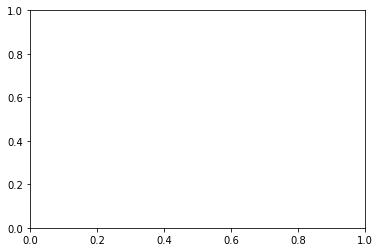

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *


N = 30
P = 2
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randint(P, size = N), dtype="category")

for criteria in ['information_gain', 'gini_index']:
    tree = DecisionTree(criterion=criteria, max_depth=10) #Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    # print(pd.DataFrame({'y_hat':y_hat, 'y':y}))
    tree.plot()
    print('Criteria :', criteria)
    print('Accuracy: ', accuracy(y_hat, y))
    for cls in y.unique():
        print('Class: ', cls)
        print('Precision: ', precision(y_hat, y, cls))
        print('Recall: ', recall(y_hat, y, cls))


In [5]:
import pandas as pd
a = pd.Series(data=[4.9,8.2,5.6],index=[13,11,12])
a

13    4.9
11    8.2
12    5.6
dtype: float64

In [6]:
a.reset_index(drop=True, inplace = True)
a

0    4.9
1    8.2
2    5.6
dtype: float64

In [1]:
import pandas as pd

y = pd.Series([1,2,3,4,5,6,7,8,9,10], index=[1,2,3,4,5,6,7,8,9,10])

x = pd.Series([1,7,3,8,5,9,2], index=[1,2,3,4,5,6,7])

print(x)
print(y)

1    1
2    7
3    3
4    8
5    5
6    9
7    2
dtype: int64
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
dtype: int64


In [2]:
y[x < 5]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [5]:
outerFolds = 5 
res = [(int(i/outerFolds *100), int((i+1)/outerFolds *100)) for i in range(outerFolds)]


In [6]:
res

[(0, 20), (20, 40), (40, 60), (60, 80), (80, 100)]